# Merging Dataframes

In [1]:
"""
@author: Yoss_Shor
"""
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


In [3]:
df['Delivered'] = True
df

,Name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


In [4]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [5]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [14]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
print(staff_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader


In [15]:
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(student_df.head())

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [20]:
pd.merge(staff_df, student_df, how = 'outer', left_index = True, right_index = True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [21]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [22]:
pd.merge(staff_df, student_df, how = 'left', left_index = True, right_index = True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [23]:
pd.merge(staff_df, student_df, how = 'left', left_index = True, right_index = True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [26]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how = 'left', left_on = 'Name', right_on ='Name')

,level_0_x,index_x,Name,Role,level_0_y,index_y,School
0,0,0,Kelly,Director of HR,NaN,NaN,NaN
1,1,1,Sally,Course liasion,2.0,2.0,Engineering
2,2,2,James,Grader,0.0,0.0,Business


In [28]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
#pd.merge(staff_df, student_df, how = 'outer')
pd.merge(staff_df, student_df, how = 'left', left_on = 'Name', right_on = 'Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [30]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how = 'inner', left_on = ['First Name','Last Name'], right_on = ['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [34]:
import pandas as pd
df = pd.read_csv('census.csv')
df.head(12)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [35]:
(df.where(df['SUMLEV'] == 50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns = {'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [36]:
df = df[df['SUMLEV'] == 50]
df.set_index(['STNAME','CTYNAME'], inplace = True)
df.rename(columns = {'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [37]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [38]:
df.apply(min_max, axis = 1)

min       max
STNAME  CTYNAME                              
Alabama Autauga County      54660.0   55347.0
        Baldwin County     183193.0  203709.0
        Barbour County      26489.0   27341.0
        Bibb County         22512.0   22861.0
        Blount County       57373.0   57776.0
...                             ...       ...
Wyoming Sweetwater County   43593.0   45162.0
        Teton County        21297.0   23125.0
        Uinta County        20822.0   21102.0
        Washakie County      8316.0    8545.0
        Weston County        7065.0    7234.0

[3142 rows x 2 columns]

In [39]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis = 1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County           54571.0            54571.0          54660.0   
        Baldwin County          182265.0           182265.0         183193.0   
        Barbour County           27457.0            27457.0          27341.0   
        Bibb County              22915.0            22919.0          22861.0   
        Blount County            57322.0            57322.0          57373.0   
...                                  ...                ...              ...   
Wyoming Sweetwater County        43806.0            43806.0          43593.0   
        Teton County             21294.0            21294.0          21297.0   
        Uinta County             21118.0            21118.0          21102.0   
        Washakie County           8533.0             8533.0           8545.0   
        Weston County             7208.0             7208.0           7181.0   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County             55253.0          55175.0  ...   
        Baldwin County            186659.0         190396.0  ...   
        Barbour County             27226.0          27159.0  ...   
        Bibb County                22733.0          22642.0  ...   
        Blount County              57711.0          57776.0  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County          44041.0          45104.0  ...   
        Teton County               21482.0          21697.0  ...   
        Uinta County               20912.0          20989.0  ...   
        Washakie County             8469.0           8443.0  ...   
        Weston County               7114.0           7065.0  ...   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
        Bibb County               -6.201001         -0.177537   
        Blount County             -1.748766         -2.062535   
...                                     ...               ...   
Wyoming Sweetwater County         -5.339774        -14.252889   
        Teton County              19.525929         14.143021   
        Uinta County              -6.902954        -14.215862   
        Washakie County           -2.013502        -17.781491   
        Weston County             12.372583          1.533635   

                           RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  \
STNAME  CTYNAME                                                         
Alabama Autauga County            -2.530799     7.606016    -2.626146   
        Baldwin County            17.197872    15.844176    18.559627   
        Barbour County           -10.543299    -4.87

In [40]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis = 1)

STNAME   CTYNAME          
Alabama  Autauga County        55347.0
         Baldwin County       203709.0
         Barbour County        27341.0
         Bibb County           22861.0
         Blount County         57776.0
                                ...   
Wyoming  Sweetwater County     45162.0
         Teton County          23125.0
         Uinta County          21102.0
         Washakie County        8545.0
         Weston County          7234.0
Length: 3142, dtype: float64

# Group by

In [63]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV'] == 50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [49]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME'] == state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

In [50]:
df['STNAME'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [52]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

In [56]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [64]:
df = df.set_index('STNAME')

def fun(item):
    if item[0] < 'M':
        return 0
    if item[0] < 'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [65]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV'] == 50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [66]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [67]:
print(type(df.groupby(level = 0)['POPESTIMATE2010', 'POPESTIMATE2011']))
print(type(df.groupby(level  =0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [70]:
(df.set_index('STNAME').groupby(level = 0)['CENSUS2010POP'].agg({'avg': np.average, 'sum': np.sum, 'min':np.min}))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,avg,sum,min
STNAME,,,
Alabama,71339.343284,4779736,9045
Alaska,24490.724138,710231,662
Arizona,426134.466667,6392017,8437
Arkansas,38878.906667,2915918,5368
California,642309.586207,37253956,1175
Colorado,78581.187500,5029196,699
Connecticut,446762.125000,3574097,118428
Delaware,299311.333333,897934,162310
District of Columbia,601723.000000,601723,601723


In [71]:
(df.set_index('STNAME').groupby(level = 0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

In [72]:
(df.set_index('STNAME').groupby(level = 0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


In [78]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index = ['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns = {0: 'Grades'}, inplace = True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [80]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [83]:
grades = df['Grades'].astype('category')
grades

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [85]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV'] == 50]
df = df.set_index('STNAME').groupby(level = 0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'], 10)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  This is separate from the ipykernel package so we can avoid doing imports until


STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

# Pivot Tables

In [87]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [88]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [89]:
df.pivot_table(values = '(kW)', index = 'YEAR', columns = 'Make', aggfunc = np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [91]:
df.pivot_table(values = '(kW)', index = 'YEAR', columns = 'Make', aggfunc = [np.mean, np.min], margins = True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Date Functionality in Pandas


### Timestamp

In [94]:
pd.Timestamp('17/02/2020 10:05AM')

Timestamp('2020-02-17 10:05:00')

### Period

In [96]:
pd.Period('2/2020')

Period('2020-02', 'M')

In [97]:
pd.Period('3/5/2020')

Period('2020-03-05', 'D')

### DatetimeIndex

In [100]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2020-09-01'), pd.Timestamp('2020-09-02'), pd.Timestamp('2020-09-03')])
t1

2020-09-01    a
2020-09-02    b
2020-09-03    c
dtype: object

In [101]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [104]:
t2 = pd.Series(list('def'), [pd.Period('2020-09'), pd.Period('2020-10'), pd.Period('2020-11')])
t2

2020-09    d
2020-10    e
2020-11    f
Freq: M, dtype: object

In [105]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [106]:
d1 = ['2 June 2013', 'Aug 29, 2020', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index = d1, columns = list('ab'))
ts3

,a,b
2 June 2013,34,37
"Aug 29, 2020",46,79
2015-06-26,88,43
7/12/16,54,15


In [107]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,34,37
2020-08-29,46,79
2015-06-26,88,43
2016-07-12,54,15


In [154]:
pd.to_datetime('4.7.19', dayfirst = True)

Timestamp('2019-07-04 00:00:00')

### Timedeltas

In [109]:
pd.Timestamp('9/3/2020') - pd.Timestamp('9/1/2020')

Timedelta('2 days 00:00:00')

In [110]:
pd.Timestamp('9/2/2019 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2019-09-14 11:10:00')

### Working with Dates in a Dataframe

In [143]:
dates = pd.date_range('10-01-2019', periods = 9, freq = '2W-SUN')
dates

DatetimeIndex(['2019-10-06', '2019-10-20', '2019-11-03', '2019-11-17',
               '2019-12-01', '2019-12-15', '2019-12-29', '2020-01-12',
               '2020-01-26'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [146]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index = dates)
df

,Count 1,Count 2
2019-10-06,109,123
2019-10-20,115,128
2019-11-03,114,116
2019-11-17,111,120
2019-12-01,113,119
2019-12-15,117,127
2019-12-29,126,127
2020-01-12,133,125
2020-01-26,142,121


In [145]:
df['days'] = df.index.weekday_name
df

,Count 1,Count 2,days
2019-10-06,104,128,Sunday
2019-10-20,106,120,Sunday
2019-11-03,110,121,Sunday
2019-11-17,115,127,Sunday
2019-12-01,124,125,Sunday
2019-12-15,125,124,Sunday
2019-12-29,130,128,Sunday
2020-01-12,130,127,Sunday
2020-01-26,131,116,Sunday


In [147]:
df.diff()

,Count 1,Count 2
2019-10-06,NaN,NaN
2019-10-20,6.0,5.0
2019-11-03,-1.0,-12.0
2019-11-17,-3.0,4.0
2019-12-01,2.0,-1.0
2019-12-15,4.0,8.0
2019-12-29,9.0,0.0
2020-01-12,7.0,-2.0
2020-01-26,9.0,-4.0


In [148]:
df.resample('M').mean()

,Count 1,Count 2
2019-10-31,112.000000,125.500000
2019-11-30,112.500000,118.000000
2019-12-31,118.666667,124.333333
2020-01-31,137.500000,123.000000


In [149]:
df['2019']

,Count 1,Count 2
2019-10-06,109,123
2019-10-20,115,128
2019-11-03,114,116
2019-11-17,111,120
2019-12-01,113,119
2019-12-15,117,127
2019-12-29,126,127


In [150]:
df['2019-11']

,Count 1,Count 2
2019-11-03,114,116
2019-11-17,111,120


In [151]:
df['2019-11':]

,Count 1,Count 2
2019-11-03,114,116
2019-11-17,111,120
2019-12-01,113,119
2019-12-15,117,127
2019-12-29,126,127
2020-01-12,133,125
2020-01-26,142,121


In [152]:
df.asfreq('W', method = 'ffill')

,Count 1,Count 2
2019-10-06,109,123
2019-10-13,109,123
2019-10-20,115,128
2019-10-27,115,128
2019-11-03,114,116
2019-11-10,114,116
2019-11-17,111,120
2019-11-24,111,120
2019-12-01,113,119
2019-12-08,113,119


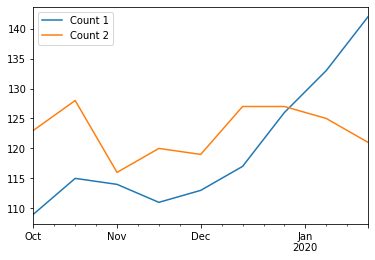

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()